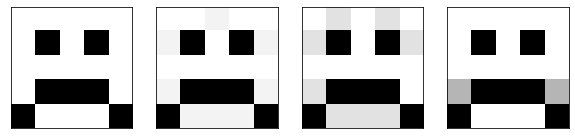

In [5]:
#Process of Creating a simple GAN
#Scenario:
#We want to generate a sad face 5x5 matrix
import numpy as np
from numpy import random
from matplotlib import pyplot as plt

#Plotting Function
def view_samples(samples,m,n):
    fig, axes = plt.subplots(figsize=(10,10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(),samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((5,5)), cmap='Greys_r')
    return fig, axes

faces = [np.array([0,0,0,0,0,
                   0,1,0,1,0,
                   0,0,0,0,0,
                   0,1,1,1,0,
                   1,0,0,0,1]),
         np.array([0,0,0.10,0,0,
                   0.1,1,0,1,0.1,
                   0,0,0,0,0,
                   0.1,1,1,1,0.1,
                   1,0.1,0.1,0.1,1]),
         np.array([0,0.2,0,0.2,0,
                   0.2,1,0,1,0.2,
                   0,0,0,0,0,
                   0.2,1,1,1,0,
                   1,0.2,0.2,0.2,1]),
         np.array([0,0,0,0,0,
                   0,1,0,1,0,
                   0,0,0,0,0,
                   0.4,1,1,1,0.4,
                   1,0,0,0,1])]

_ = view_samples(faces, 1,4)

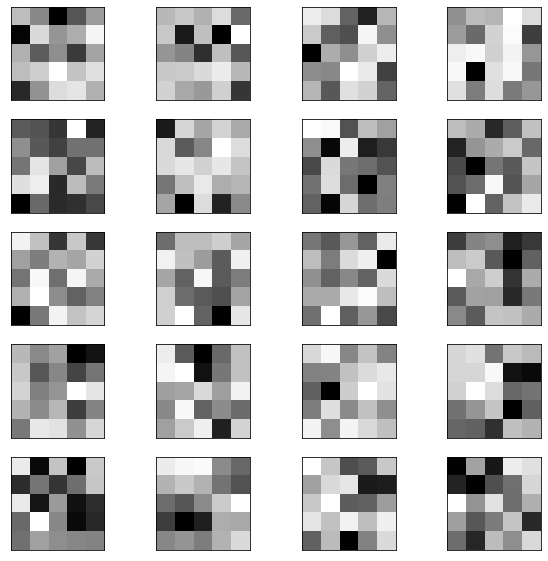

In [6]:
noise = [np.random.randn(5,5) for i in range(20)]
def generate_noise():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 5,4)

In [7]:
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

In [15]:
class Discriminator():
    def __init__(self):
        #self.weights = np.array([0.0 for i in range(4)])
        #self.bias = 0.0
        self.weights = np.array([np.random.normal() for i in range(25)])
        self.bias = np.random.normal()
    
    def forward(self, x):
        # Forward pass
        return sigmoid(np.dot(x, self.weights) + self.bias)
    
    def error_from_image(self, image):
        prediction = self.forward(image)
        # We want the prediction to be 1, so the error is -log(prediction)
        return -np.log(prediction)
    
    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias
    
    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        return -np.log(1-prediction)
    
    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias
    
    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

In [17]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(25)])
        self.biases = np.array([np.random.normal() for i in range(25)])

    def forward(self, z):
        # Forward pass
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        y = discriminator.forward(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        error_after = self.error(z, discriminator)

In [18]:
# Set random seed
np.random.seed(42)

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# The GAN
D = Discriminator()
G = Generator()

# For the error plot
errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
    
    for face in faces:
        
        # Update the discriminator weights from the real face
        D.update_from_image(face)
    
        # Pick a random number to generate a fake face
        z = random.rand()

        # Calculate the discriminator error
        errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))
        
        # Calculate the generator error
        errors_generator.append(G.error(z, D))
        
        # Build a fake face
        noise = G.forward(z)
        
        # Update the discriminator weights from the fake face
        D.update_from_noise(noise)
    
        # Update the generator weights from the fake face
        G.update(z, D)

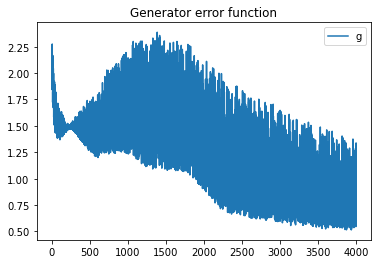

Text(0.5, 1.0, 'Discriminator error function')

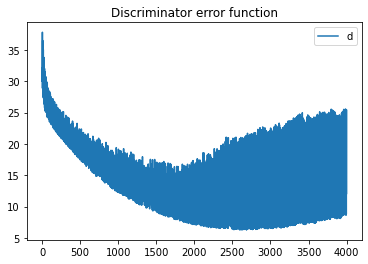

In [19]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminator error function")

[0.07130923 0.05106711 0.0523032  0.05150151 0.03860457 0.03360153
 0.9538035  0.05839591 0.80600387 0.10907597 0.03398322 0.04697474
 0.08159732 0.0182529  0.01749917 0.06353007 0.89643691 0.82515589
 0.9341272  0.03288046 0.95603227 0.0387993  0.03783266 0.02058468
 0.83688052]
[0.10390825 0.05805313 0.07748758 0.07442502 0.06070644 0.03020691
 0.93832786 0.09018296 0.77255372 0.15215262 0.04307745 0.07864809
 0.11427775 0.02666325 0.02432494 0.0772372  0.88966616 0.81659554
 0.93375349 0.05129551 0.95337018 0.04241377 0.05335622 0.03229927
 0.8178577 ]
[0.03795253 0.04143604 0.02723814 0.02798697 0.01827205 0.03987644
 0.97127317 0.02825139 0.85191935 0.06191844 0.02307391 0.01989331
 0.04637234 0.00984242 0.01023851 0.04608601 0.90660015 0.83831587
 0.93472684 0.0158127  0.96002915 0.03357665 0.0215042  0.00985693
 0.86419234]
[0.05383279 0.04649416 0.03907474 0.03921001 0.02762169 0.03629864
 0.96265785 0.04223408 0.82789271 0.08484121 0.02856341 0.03200233
 0.06343782 0.01383163 

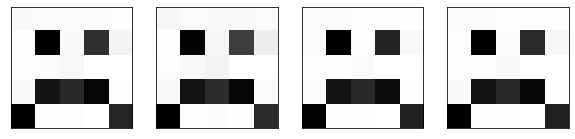

In [20]:
generated_images = []
for i in range(4):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
for i in generated_images:
    print(i)

In [21]:
print("Generator weights", G.weights)
print("Generator biases", G.biases)

Generator weights [-1.78649875 -0.58770732 -1.82020871 -1.70168684 -2.0626604   0.47675993
  1.32307931 -2.03231932  0.87311873 -1.65727277 -1.06870131 -2.38005655
 -1.61683737 -1.67966828 -1.45757503 -0.91060795  0.30732235  0.25235205
  0.02625226 -2.01070821  0.26685022 -0.40235158 -1.5605635  -2.00455771
  0.57770053]
Generator biases [-2.10477648 -2.77022129 -2.42628631 -2.47322723 -2.6816286  -3.48229084
  2.68541644 -2.25479832  1.19846915 -1.67165776 -3.07095703 -2.39456874
 -2.00273898 -3.55066149 -3.6510308  -2.45512857  2.07877597  1.48642146
  2.64509843 -2.86149141  3.0103306  -3.10573622 -2.83246717 -3.34404687
  1.48580985]


In [22]:
print("Discriminator weights", D.weights)
print("Discriminator bias", D.bias)

Discriminator weights [-1.42213352 -0.80624207 -1.65996911 -2.1677029  -1.80482831 -0.86041162
 -0.16064718 -1.75409444  1.16748874 -0.83404631 -1.6234295  -1.08182609
 -0.98483183 -2.72323439 -2.9380151  -0.04962607  1.30520728 -0.162779
  1.00990501 -1.05378272 -0.51272354 -0.930205   -1.50131303 -0.63850664
  0.96627987]
Discriminator bias -2.5147324016794808
